In [1]:
from PIL import Image # Read Images from the file location
import os 

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Dropout,BatchNormalization, Flatten, Conv2D, MaxPool2D,Input  # Layers to be used in CNN(Keras) Model
from keras.optimizers import RMSprop # It will compile the Model

from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


In [2]:
train_gen = ImageDataGenerator(
    rescale = 1. /255,
    horizontal_flip = True,
    zoom_range = 0.2
        )

In [28]:
train_dir = './train'

In [20]:
train_data = train_gen.flow_from_directory(
    train_dir,
    target_size = (300,300),
    class_mode = 'categorical')

Found 1659 images belonging to 5 classes.


In [21]:
type(train_data)

keras.preprocessing.image.DirectoryIterator

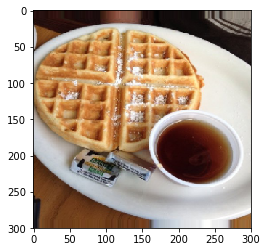

In [23]:
plt.imshow(train_data[0][0][0])

In [24]:
test_gen = ImageDataGenerator(
        rescale = 1. /255)

In [32]:
test_dir = './test/'

In [56]:
def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        img=  img.convert('RGB')
        img = img.resize((300,300))
        img = np.array(img)
        img = img/255
        if img is not None:
            images.append(img)
    return images

def load_names(folder):
    names = []
    for filename in os.listdir(folder):
        names.append(filename)
           
    return names

In [57]:
test_img = load_images(test_dir)

In [39]:
len(test_img)

281

In [40]:
test_names = load_names(test_dir)

In [41]:
len(test_names)

281

In [44]:
test_names[0:5]

['0.jpg', '1.jpg', '10.jpg', '100.jpg', '101.jpg']

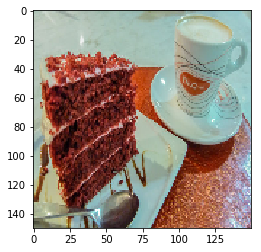

In [46]:
plt.imshow(test_img[4])

In [47]:
model = Sequential([
    Conv2D(64, (5, 5), activation='relu', input_shape=(300,300,3)),
  
    MaxPool2D(pool_size=(2, 2)),
 
    Conv2D(64, (5, 5), activation='relu'),
  
    MaxPool2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),

    MaxPool2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128,activation = 'relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(5,activation = 'softmax')
])

In [48]:
model.compile(loss='categorical_crossentropy', optimizer= 'rmsprop' ,metrics=['accuracy'])

In [49]:
model.fit_generator(train_data,epochs = 3)

Epoch 1/3
52/52 [==============================] - 580s 11s/step - loss: 1.8103 - accuracy: 0.2839
Epoch 2/3
52/52 [==============================] - 561s 11s/step - loss: 1.6500 - accuracy: 0.3490
Epoch 3/3
52/52 [==============================] - 483s 9s/step - loss: 1.6066 - accuracy: 0.3779


In [58]:
test_img = np.array(test_img)

In [60]:
pred1 = model.predict(test_img)

In [59]:
test_img.shape

(281, 300, 300, 3)

In [63]:
a = np.zeros([281,1])

In [64]:
a = np.argmax(pred1,axis = 1)

In [68]:
a[0:10]

array([0, 3, 3, 0, 3, 3, 2, 3, 2, 3], dtype=int64)

In [67]:
test_names[0:10]

['0.jpg',
 '1.jpg',
 '10.jpg',
 '100.jpg',
 '101.jpg',
 '102.jpg',
 '103.jpg',
 '104.jpg',
 '105.jpg',
 '106.jpg']

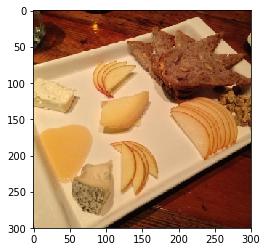

In [73]:
plt.imshow(test_img[3])

In [77]:
sub = pd.DataFrame({'image':test_names,'label':None})

In [79]:
sub.head()

,image,label
0,0.jpg,None
1,1.jpg,None
2,10.jpg,None
3,100.jpg,None
4,101.jpg,None


In [80]:
sub.to_csv('predictions1.csv',index = False)

0 : Roti <br/>
1 : Milk <br/>
2 : Ice_creams <br/>
3 : egg <br/>
4 : sticks <br/>
